# Crafting a Story - Major League Baseball

Professional baseball is considered to be founded in 1869 when the Cincinnati Red Stockings were established as the first professional team. There have been many different teams and leagues since then, but 

Going to look at how players have changed over the years, based on nujmber of runs, number of home runs, bases stolen. Then at pitchers: number of hits and HR allowed as well as number of strikeouts.

Possible to look into in the future: how has salary changed over the years? has it been proportional to the rise if player ability, or shot up on its own.

### Initial Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
people = pd.read_csv('People.csv')
people.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,2021.0,1.0,22.0,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [117]:
batting = pd.read_csv('Batting.csv')
batting

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110490,zimmejo02,2021,1,MIL,NL,2,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
110491,zimmeky01,2021,1,KCA,AL,52,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
110492,zimmery01,2021,1,WAS,NL,110,255,27,62,16,...,46.0,0.0,0.0,16,77.0,0.0,0.0,0.0,2.0,9.0
110493,zuberty01,2021,1,KCA,AL,31,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0


In [118]:
pitching = pd.read_csv('Pitching.csv')
pitching

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49425,zeuchtj01,2021,1,TOR,AL,0,2,5,3,0,...,0.0,0,0.0,0,74.0,0,16,0.0,0.0,2.0
49426,zimmebr02,2021,1,BAL,AL,4,5,14,13,0,...,0.0,0,2.0,1,285.0,0,37,1.0,2.0,3.0
49427,zimmejo02,2021,1,MIL,NL,0,0,2,0,0,...,0.0,0,1.0,0,26.0,1,5,0.0,0.0,1.0
49428,zimmeky01,2021,1,KCA,AL,4,1,52,2,0,...,1.0,9,0.0,0,223.0,9,32,0.0,4.0,13.0


I'm interested in data by year, so going to group batting and pitching dataframes by year.

In [88]:
batting_year = batting.groupby(['yearID']).sum()

#want to know how many players are included in each year's stats and how many teams are included
batting_year['num_players'] = batting.groupby('yearID')['playerID'].nunique()
batting_year['num_teams'] = batting.groupby('yearID')['teamID'].nunique()
batting_year = batting_year.reset_index()
batting_year

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,num_players,num_teams
0,1871,115,2296,10822,2659,3101,434,239,47,1783.0,...,123.0,393,175.0,0.0,0.0,0.0,0.0,74.0,115,9
1,1872,172,3306,15665,3390,4467,581,145,37,2132.0,...,134.0,263,265.0,0.0,0.0,0.0,0.0,97.0,143,11
2,1873,128,3604,16959,3580,4926,570,211,47,2331.0,...,131.0,335,278.0,0.0,0.0,0.0,0.0,122.0,122,9
3,1874,126,4199,19104,3470,5224,634,194,40,2252.0,...,97.0,238,357.0,0.0,0.0,0.0,0.0,107.0,120,8
4,1875,247,6248,26833,4234,6812,839,273,40,2710.0,...,320.0,249,675.0,0.0,0.0,0.0,0.0,142.0,188,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2017,1638,70743,165567,22582,42215,8397,795,6105,21558.0,...,934.0,15829,40104.0,970.0,1763.0,925.0,1168.0,3804.0,1358,30
147,2018,1705,71590,165432,21630,41018,8264,847,5585,20606.0,...,958.0,15686,41207.0,929.0,1922.0,823.0,1235.0,3457.0,1379,30
148,2019,1742,71684,166651,23467,42039,8531,785,6776,22471.0,...,832.0,15895,42823.0,753.0,1984.0,776.0,1150.0,3463.0,1410,30
149,2020,1433,26721,59030,8344,14439,2823,241,2304,7978.0,...,292.0,6092,15586.0,202.0,821.0,126.0,402.0,1237.0,1289,30


In [89]:
#doing the same thing with pitchers
pitching_year = pitching.groupby(['yearID']).sum()
pitching_year['num_players'] = pitching.groupby('yearID')['playerID'].nunique()
pitching_year['num_teams'] = pitching.groupby('yearID')['teamID'].nunique()
pitching_year = pitching_year.reset_index()
pitching_year

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,...,HBP,BK,BFP,GF,R,SH,SF,GIDP,num_players,num_teams
0,1871,19,120,120,277,254,231,4,4,6750,...,0.0,2,11215.0,23,2659,0.0,0.0,0.0,19,9
1,1872,27,178,178,405,366,327,10,7,9858,...,0.0,2,15928.0,39,3390,0.0,0.0,0.0,21,11
2,1873,25,197,197,434,398,362,8,9,10754,...,0.0,1,17294.0,36,3580,0.0,0.0,0.0,25,9
3,1874,17,231,231,490,464,439,15,3,12509,...,0.0,0,19342.0,25,3470,0.0,0.0,0.0,17,8
4,1875,53,335,335,763,690,621,49,18,18571,...,0.0,5,27082.0,69,4234,0.0,0.0,0.0,42,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2017,928,2430,2430,20517,4860,59,27,1179,129771,...,1763.0,155,185295.0,4801,22582,925.0,1168.0,3804.0,755,30
147,2018,999,2431,2431,21197,4862,42,19,1244,130467,...,1922.0,151,185139.0,4820,21630,823.0,1235.0,3457.0,799,30
148,2019,1037,2429,2429,21429,4858,45,26,1180,130270,...,1984.0,153,186517.0,4813,23467,776.0,1150.0,3463.0,831,30
149,2020,807,898,898,7959,1796,29,12,422,46406,...,821.0,63,66506.0,1767,8344,126.0,402.0,1238.0,735,30


Have the information that I want from the datasets, not to look at trends.

## Batting Trends

Answering questions like: have the number of home runs increased over the years? What about number of hits? Number of home runs? Has stealing bases become more popular?

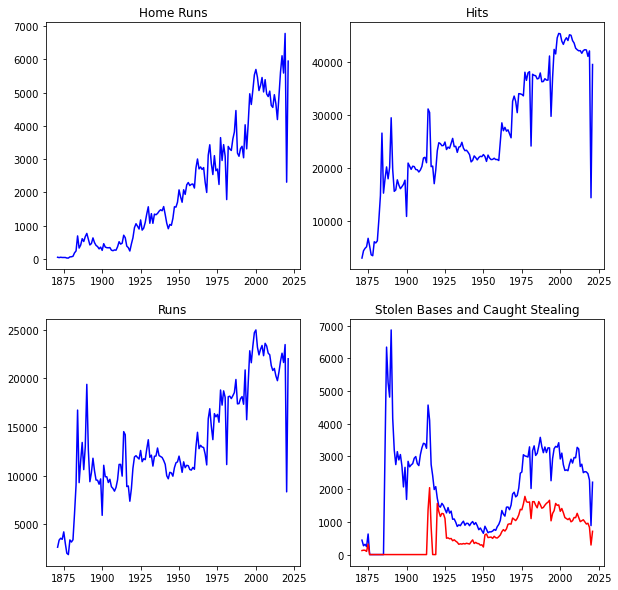

In [101]:
fig, ax = plt.subplots(2,2, figsize = (10,10))
ax[0,0].plot(batting_year['yearID'], batting_year['HR'], color = 'b')
ax[0,0].set_title('Home Runs')
ax[1,0].plot(batting_year['yearID'], batting_year['R'], color = 'b')
ax[1,0].set_title('Runs')
ax[0,1].plot(batting_year['yearID'], batting_year['H'], color = 'b')
ax[0,1].set_title('Hits')
ax[1,1].plot(batting_year['yearID'], batting_year['SB'], color = 'b')
ax[1,1].plot(batting_year['yearID'], batting_year['CS'], color = 'r')
ax[1,1].set_title('Stolen Bases and Caught Stealing')
plt.show()

It makes sense that there would be an increase in homerunes, runs and hits. But I want to see if the number each player gets increases as well, or if the increase is simply due to the increase in people playing.

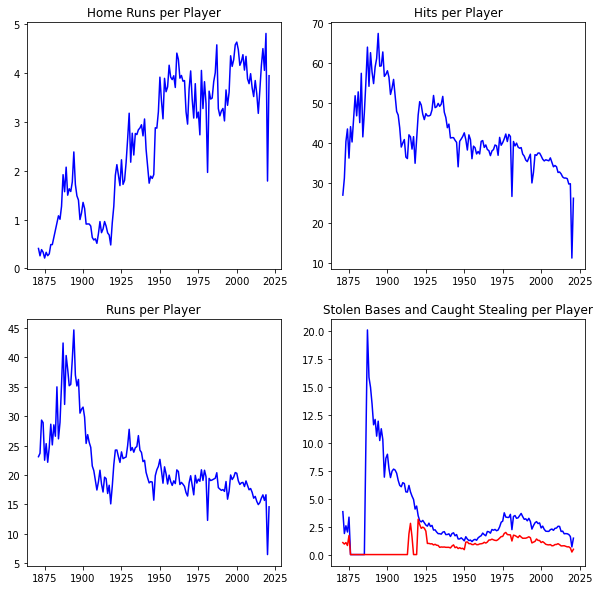

In [123]:
fig, ax = plt.subplots(2,2, figsize = (10,10))
ax[0,0].plot(batting_year['yearID'], batting_year['HR']/batting_year['num_players'], color = 'b')
ax[0,0].set_title('Home Runs per Player')
ax[1,0].plot(batting_year['yearID'], batting_year['R']/batting_year['num_players'], color = 'b')
ax[1,0].set_title('Runs per Player')
ax[0,1].plot(batting_year['yearID'], batting_year['H']/batting_year['num_players'], color = 'b')
ax[0,1].set_title('Hits per Player')
ax[1,1].plot(batting_year['yearID'], batting_year['SB']/batting_year['num_players'], color = 'b')
ax[1,1].plot(batting_year['yearID'], batting_year['CS']/batting_year['num_players'], color = 'r')
ax[1,1].set_title('Stolen Bases and Caught Stealing per Player')
plt.show()

It is interesting that home runs increase while hits and runs decrease.

I'm suprised by how few home runs there are per batter, some of my favorites have way more than 4.5 per year. Looking at the original data, all pitchers are included in the batting statistics. However, the only pitchers that routinely play are the National League (NL) pitchers where they are required to go up to bat anytime they are the pitcher in the game. In the American League (AL), pitchers do not go up to bat, rather there is a designated that goes up in their place. The only time AL pitchers go up to bat is when they are playing a NL team at the NL team's stadium. I think this is why the home runs and hits per player are lower than I expected.

But also brings up an interesting thought that maybe pitchers in general bring down the averages. I'm come up with three scenarios to look at:

**Scenario 1:** Batting stats without AL pitchers. To look into this, I'm going to remove the pitchers in the AL from the batting dataframe and look at how that compares to the original data.

**Scenario 2:** Batting stats with no pitchers at all. Will remove all pitchers from the batting dataframe and see how that changes the data.

**Scenario 3:** Batting stats just for pitchers. Only look at how pitchers fare with batting numbers and compare that to the scenario 2 data with all players other than pitchers.

In [141]:
#Going to be plotting the same things for each scenario, so instead of copy and pasting the same code over and over, 
#going to create a function

def compare_plot(df1, df2, label1, label2, per_player):
    if per_player == True: 
        pp = ' per Player'
        fig, ax = plt.subplots(2,2, figsize = (10,10))
        ax[0,0].plot(df1['yearID'], df1['HR']/df1['num_players'], color = 'b', label = label1)
        ax[0,0].plot(df2['yearID'], df2['HR']/df2['num_players'], color = 'g', label = label2)
        ax[0,0].set_title('Home Runs' + pp)
        ax[1,0].plot(df1['yearID'], df1['R']/df1['num_players'], color = 'b', label = label1)
        ax[1,0].plot(df2['yearID'], df2['R']/df2['num_players'], color = 'g', label = label2)
        ax[1,0].set_title('Runs' + pp)
        ax[0,1].plot(df1['yearID'], df1['H']/df1['num_players'], color = 'b', label = label1)
        ax[0,1].plot(df2['yearID'], df2['H']/df2['num_players'], color = 'g', label = label2)
        ax[0,1].set_title('Hits' + pp)
        ax[1,1].plot(df1['yearID'], df1['SB']/df1['num_players'], color = 'b', label = label1)
        ax[1,1].plot(df1['yearID'], df1['CS']/df1['num_players'], color = 'r', label = label1)
        ax[1,1].plot(df2['yearID'], df2['SB']/df2['num_players'], color = 'g', label = label2)
        ax[1,1].plot(df2['yearID'], df2['CS']/df2['num_players'], color = 'c', label = label2)
        ax[1,1].set_title('Stolen Bases and Caught Stealing' + pp)
        ax[0,0].legend()
        ax[1,0].legend()
        ax[0,1].legend()
        ax[1,1].legend()
        plt.show()
    else:
        fig, ax = plt.subplots(2,2, figsize = (10,10))
        ax[0,0].plot(df1['yearID'], df1['HR'], color = 'b', label = label1)
        ax[0,0].plot(df2['yearID'], df2['HR'], color = 'g', label = label2)
        ax[0,0].set_title('Home Runs')
        ax[1,0].plot(df1['yearID'], df1['R'], color = 'b', label = label1)
        ax[1,0].plot(df2['yearID'], df2['R'], color = 'g', label = label2)
        ax[1,0].set_title('Runs')
        ax[0,1].plot(df1['yearID'], df1['H'], color = 'b', label = label1)
        ax[0,1].plot(df2['yearID'], df2['H'], color = 'g', label = label2)
        ax[0,1].set_title('Hits')
        ax[1,1].plot(df1['yearID'], df1['SB'], color = 'b', label = label1)
        ax[1,1].plot(df1['yearID'], df1['CS'], color = 'r', label = label1)
        ax[1,1].plot(df2['yearID'], df2['SB'], color = 'g', label = label2)
        ax[1,1].plot(df2['yearID'], df2['CS'], color = 'c', label = label2)
        ax[1,1].set_title('Stolen Bases and Caught Stealing')
        ax[0,0].legend()
        ax[1,0].legend()
        ax[0,1].legend()
        ax[1,1].legend()
        plt.show()

### Scenario 1:

Batting stats without AL pitchers.

In [166]:
AL_pitchers = pitching[pitching['lgID'] == 'AL']['playerID']
AL_pitchers = AL_pitchers.to_frame()

In [169]:
outer = batting.merge(AL_pitchers, how = 'outer', on = 'playerID', indicator = True)
batting_noALpitchers = outer[(outer._merge == 'left_only')].drop('_merge', axis = 1)
batting_noALpitchers

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,addybo01,1873,1,PH2,NaN,10,51,12,16,1,...,10.0,1.0,1.0,2,0.0,NaN,NaN,NaN,NaN,0.0
3,addybo01,1873,2,BS1,NaN,31,152,37,54,6,...,32.0,6.0,5.0,2,1.0,NaN,NaN,NaN,NaN,0.0
4,addybo01,1874,1,HR1,NaN,50,213,25,51,9,...,22.0,4.0,2.0,1,1.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293976,willilu01,2021,1,PHI,NL,58,98,8,24,4,...,6.0,2.0,2.0,10,23.0,0.0,0.0,0.0,0.0,2.0
293977,wilsoco01,2021,1,WAS,NL,1,1,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
293978,wilsoja03,2021,1,OAK,AL,6,7,1,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
293979,wilsoja03,2021,2,HOU,AL,6,13,2,2,1,...,1.0,0.0,0.0,1,2.0,0.0,0.0,0.0,0.0,1.0


In [170]:
#combining into years
batting_noALpitchers_year = batting_noALpitchers.groupby(['yearID']).sum()
batting_noALpitchers_year['num_players'] = batting_noALpitchers.groupby('yearID')['playerID'].nunique()
batting_noALpitchers_year['num_teams'] = batting_noALpitchers.groupby('yearID')['teamID'].nunique()
batting_noALpitchers_year = batting_noALpitchers_year.reset_index()
batting_noALpitchers_year

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,num_players,num_teams
0,1871,115,2296,10822,2659,3101,434,239,47,1783.0,...,123.0,393,175.0,0.0,0.0,0.0,0.0,74.0,115,9
1,1872,172,3306,15665,3390,4467,581,145,37,2132.0,...,134.0,263,265.0,0.0,0.0,0.0,0.0,97.0,143,11
2,1873,128,3604,16959,3580,4926,570,211,47,2331.0,...,131.0,335,278.0,0.0,0.0,0.0,0.0,122.0,122,9
3,1874,126,4199,19104,3470,5224,634,194,40,2252.0,...,97.0,238,357.0,0.0,0.0,0.0,0.0,107.0,120,8
4,1875,247,6248,26833,4234,6812,839,273,40,2710.0,...,320.0,249,675.0,0.0,0.0,0.0,0.0,142.0,188,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2017,796,49091,150267,20950,38884,7765,738,5720,19901.0,...,852.0,14733,35675.0,930.0,1595.0,544.0,1056.0,3495.0,700,30
147,2018,836,49482,148713,19840,37364,7520,771,5190,18851.0,...,879.0,14408,36273.0,868.0,1723.0,507.0,1140.0,3097.0,723,30
148,2019,861,50223,150885,21660,38430,7888,708,6351,20802.0,...,758.0,14728,38208.0,728.0,1805.0,498.0,1046.0,3159.0,740,30
149,2020,794,19228,55057,7824,13527,2638,227,2183,7515.0,...,279.0,5741,14565.0,194.0,767.0,112.0,371.0,1153.0,722,30


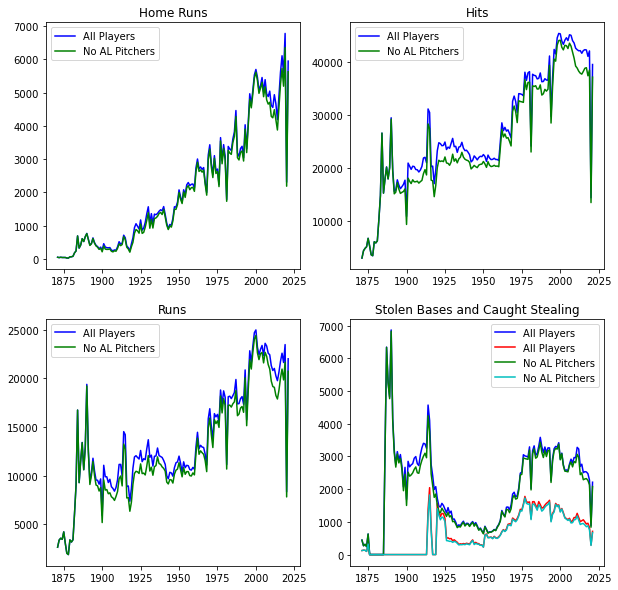

In [171]:
compare_plot(batting_year, batting_noALpitchers_year, 'All Players', 'No AL Pitchers', per_player = False)

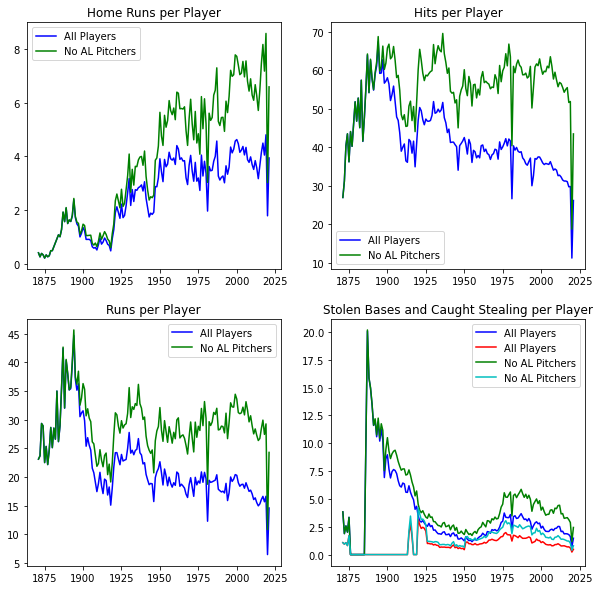

In [172]:
compare_plot(batting_year, batting_noALpitchers_year, 'All Players', 'No AL Pitchers', per_player = True)

### Scenario 2:

Batting stats with no pitchers

In [173]:
pitchers = pitching['playerID']
pitchers = pitchers.to_frame()

outer = batting.merge(pitchers, how = 'outer', indicator = True)
batting_nopitchers = outer[(outer._merge == 'left_only')].drop('_merge', axis = 1)
batting_nopitchers

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,addybo01,1873,1,PH2,NaN,10,51,12,16,1,...,10.0,1.0,1.0,2,0.0,NaN,NaN,NaN,NaN,0.0
3,addybo01,1873,2,BS1,NaN,31,152,37,54,6,...,32.0,6.0,5.0,2,1.0,NaN,NaN,NaN,NaN,0.0
4,addybo01,1874,1,HR1,NaN,50,213,25,51,9,...,22.0,4.0,2.0,1,1.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527280,willilu01,2021,1,PHI,NL,58,98,8,24,4,...,6.0,2.0,2.0,10,23.0,0.0,0.0,0.0,0.0,2.0
527281,wilsoco01,2021,1,WAS,NL,1,1,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
527282,wilsoja03,2021,1,OAK,AL,6,7,1,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
527283,wilsoja03,2021,2,HOU,AL,6,13,2,2,1,...,1.0,0.0,0.0,1,2.0,0.0,0.0,0.0,0.0,1.0


In [174]:
#combining into years
batting_nopitchers_year = batting_nopitchers.groupby(['yearID']).sum()
batting_nopitchers_year['num_players'] = batting_nopitchers.groupby('yearID')['playerID'].nunique()
batting_nopitchers_year['num_teams'] = batting_nopitchers.groupby('yearID')['teamID'].nunique()
batting_nopitchers_year = batting_nopitchers_year.reset_index()
batting_nopitchers_year

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,num_players,num_teams
0,1871,81,1488,6960,1668,1937,262,144,30,1092.0,...,92.0,239,118.0,0.0,0.0,0.0,0.0,55.0,81,9
1,1872,113,1868,8900,1938,2514,318,74,24,1180.0,...,79.0,112,144.0,0.0,0.0,0.0,0.0,50.0,98,11
2,1873,77,1887,8873,1892,2526,290,115,23,1185.0,...,80.0,146,140.0,0.0,0.0,0.0,0.0,55.0,75,9
3,1874,80,2139,9674,1721,2599,334,103,18,1104.0,...,57.0,112,158.0,0.0,0.0,0.0,0.0,47.0,76,8
4,1875,162,3567,15210,2340,3720,421,144,18,1393.0,...,201.0,152,415.0,0.0,0.0,0.0,0.0,72.0,121,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2017,561,39436,129338,18151,33680,6752,640,5064,17359.0,...,735.0,12695,30610.0,835.0,1332.0,306.0,908.0,3005.0,490,30
147,2018,584,39307,128698,17412,32685,6623,681,4656,16634.0,...,784.0,12562,31067.0,767.0,1502.0,292.0,989.0,2695.0,491,30
148,2019,590,40574,133699,19535,34483,7111,651,5799,18825.0,...,698.0,13193,33456.0,654.0,1609.0,215.0,935.0,2829.0,503,30
149,2020,527,15618,50130,7206,12336,2398,204,2039,6896.0,...,264.0,5213,13339.0,182.0,695.0,97.0,337.0,1050.0,473,30


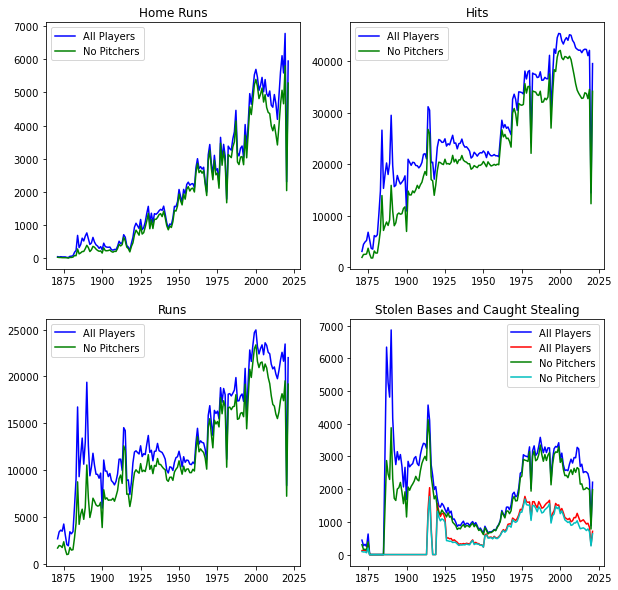

In [175]:
compare_plot(batting_year, batting_nopitchers_year, 'All Players', 'No Pitchers', per_player = False)

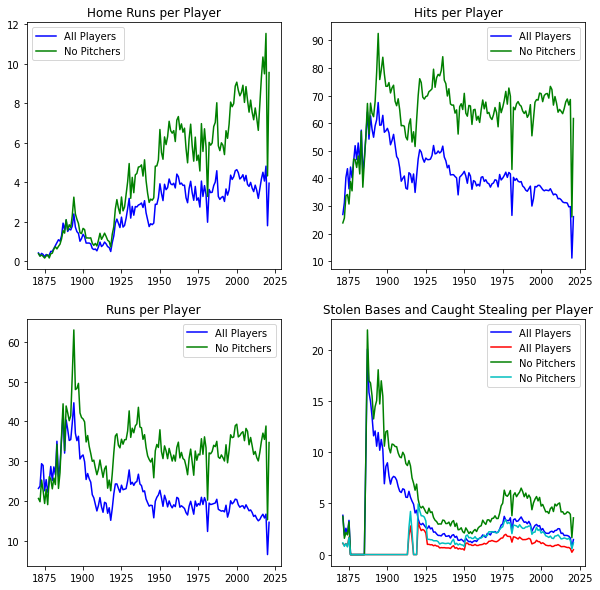

In [176]:
compare_plot(batting_year, batting_nopitchers_year, 'All Players', 'No Pitchers', per_player = True)

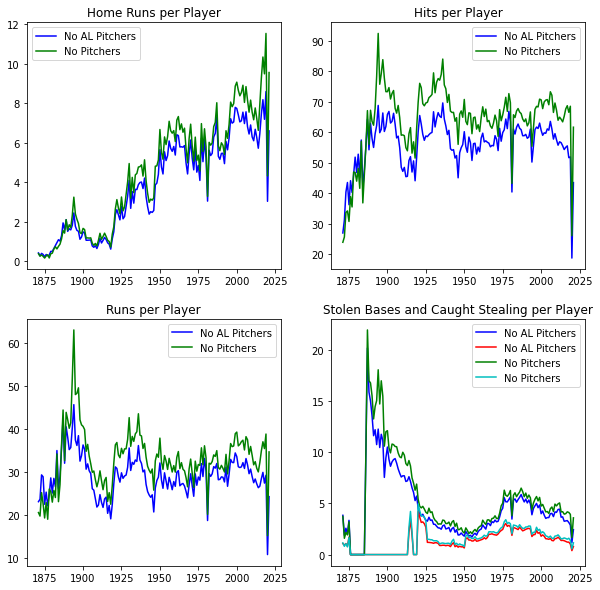

In [177]:
#Lets compare No AL pitchers to no pitchers at all
compare_plot(batting_noALpitchers_year, batting_nopitchers_year, 'No AL Pitchers', 'No Pitchers', per_player = True)

### Scenario 3:

Compare only pitchers batting numbers vs All other players batting numbers

In [178]:
#already have data for all the players other than pitchers in batting_nopitchers and batting_nopitchers_year
#Not to get only the stats for just pitchers
batting_onlypitchers = pitchers_df.merge(batting, how = 'left')

In [179]:
#combining into years
batting_onlypitchers_year = batting_onlypitchers.groupby(['yearID']).sum()
batting_onlypitchers_year['num_players'] = batting_onlypitchers.groupby('yearID')['playerID'].nunique()
batting_onlypitchers_year['num_teams'] = batting_onlypitchers.groupby('yearID')['teamID'].nunique()
batting_onlypitchers_year = batting_onlypitchers_year.reset_index()
batting_onlypitchers_year

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,num_players,num_teams
0,1871,113,2673,12750,3014,3645,519,233,38,2234.0,...,89.0,466,192.0,0.0,0.0,0.0,0.0,73.0,34,9
1,1872,176,4949,23083,4641,6291,783,192,22,3143.0,...,135.0,417,368.0,0.0,0.0,0.0,0.0,154.0,45,11
2,1873,148,5890,27628,5510,7539,785,263,60,3740.0,...,140.0,633,511.0,0.0,0.0,0.0,0.0,253.0,47,9
3,1874,156,7368,33629,5617,8912,1008,234,58,3886.0,...,115.0,366,707.0,0.0,0.0,0.0,0.0,197.0,44,8
4,1875,278,9610,40596,6083,10203,1355,414,52,4393.0,...,321.0,296,1052.0,0.0,0.0,0.0,0.0,339.0,67,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2017,7676,201622,90154,8450,17132,3016,269,1767,8454.0,...,279.0,5915,29987.0,188.0,748.0,4594.0,484.0,1618.0,868,30
147,2018,7557,193888,87589,7823,16400,2995,259,1588,7780.0,...,243.0,5849,30263.0,255.0,714.0,3703.0,478.0,1707.0,888,30
148,2019,6979,175657,76423,7128,14606,2568,222,1543,6780.0,...,229.0,4934,27785.0,129.0,592.0,3555.0,372.0,1385.0,907,30
149,2020,4868,56161,12389,1603,2913,595,45,370,1519.0,...,34.0,1223,3203.0,32.0,183.0,39.0,89.0,275.0,816,30


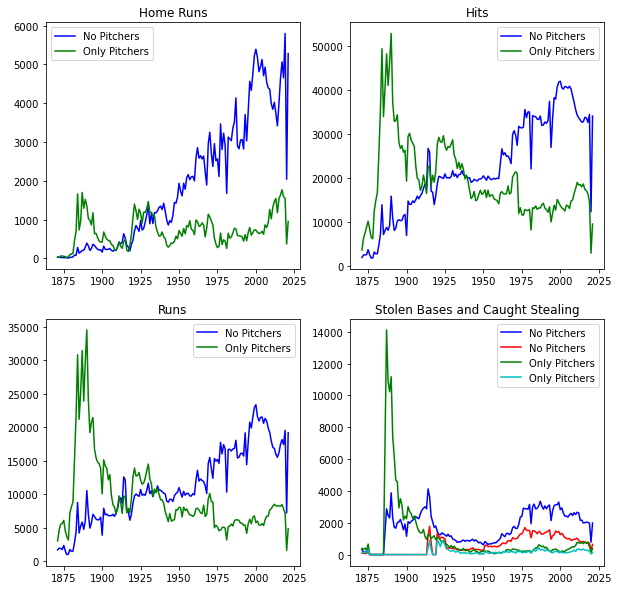

In [180]:
compare_plot(batting_nopitchers_year, batting_onlypitchers_year, 'No Pitchers', 'Only Pitchers', per_player = False)

## Pitching Trends

Want to see if pitchers have gotten better over the years. So has the number of runs/hit/home runs allowed decreased? And number of strikeouts increased?

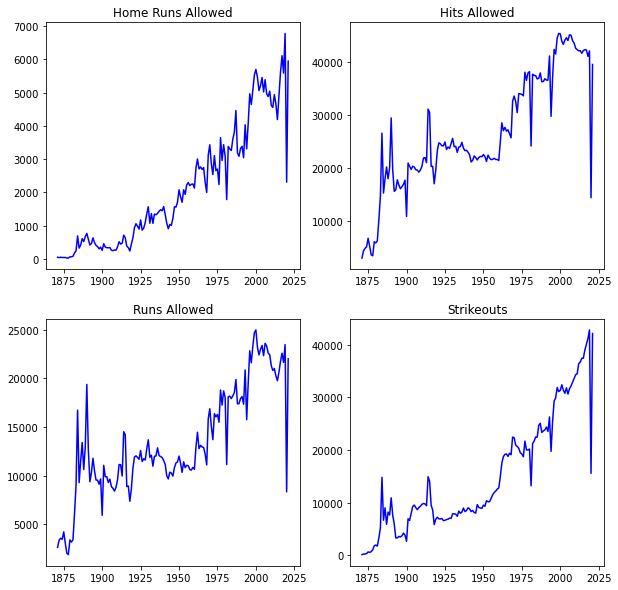

In [102]:
fig, ax = plt.subplots(2,2, figsize = (10,10))
ax[0,0].plot(pitching_year['yearID'], pitching_year['HR'], color = 'b')
ax[0,0].set_title('Home Runs Allowed')
ax[1,0].plot(pitching_year['yearID'], pitching_year['R'], color = 'b')
ax[1,0].set_title('Runs Allowed')
ax[0,1].plot(pitching_year['yearID'], pitching_year['H'], color = 'b')
ax[0,1].set_title('Hits Allowed')
ax[1,1].plot(pitching_year['yearID'], pitching_year['SO'], color = 'b')
ax[1,1].set_title('Strikeouts')
plt.show()

As with the batter data, it makes sense that there would be an increase in homeruns, runs, hits and strikeouts. But I want to see if the number each pitcher allows increases as well, or if the increase is simply due to the increase in people playing.

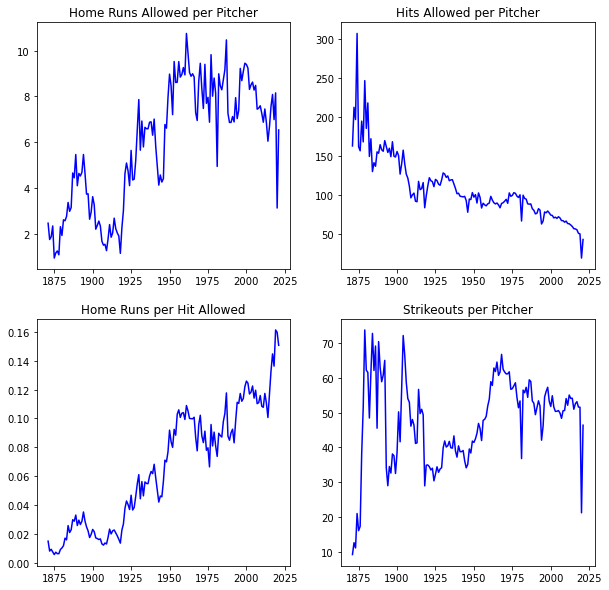

In [103]:
fig, ax = plt.subplots(2,2, figsize = (10,10))
ax[0,0].plot(pitching_year['yearID'], pitching_year['HR']/pitching_year['num_players'], color = 'b')
ax[0,0].set_title('Home Runs Allowed per Pitcher')
ax[1,0].plot(pitching_year['yearID'], pitching_year['HR']/pitching_year['H'], color = 'b')
ax[1,0].set_title('Home Runs per Hit Allowed')
ax[0,1].plot(pitching_year['yearID'], pitching_year['H']/pitching_year['num_players'], color = 'b')
ax[0,1].set_title('Hits Allowed per Pitcher')
ax[1,1].plot(pitching_year['yearID'], pitching_year['SO']/pitching_year['num_players'], color = 'b')
ax[1,1].set_title('Strikeouts per Pitcher')
plt.show()

Home runs allowed per pitcher went up then mostly stabled out from the 1950s-2020s. Hits allowed per pitcher have done the opposite, they have continued to decrease. Which is why I looked at the ratio of home runs per hit. This number has gone up. This means that although the total number of runs a pitcher allows has gone down (improvement), they still allow the same number of home runs. So home runs make up a larger proportion of hits than they did at the beginning of this dataset.